## Machine Learning HW-2 Ekin Akyildirim 2200357029
## Classification Tree

### Pull the Data

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt -O banknote.csv


--2025-04-07 16:44:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘banknote.csv’

banknote.csv            [ <=>                ]  45.31K  --.-KB/s    in 0.09s   

2025-04-07 16:44:50 (486 KB/s) - ‘banknote.csv’ saved [46400]



### Dataframe

In [3]:
import pandas as pd

column_names = [ 'variance','skewness', 'kurtosis', 'entropy', 'class']
df = pd.read_csv('banknote.csv', names=column_names)
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Visualizing the Features

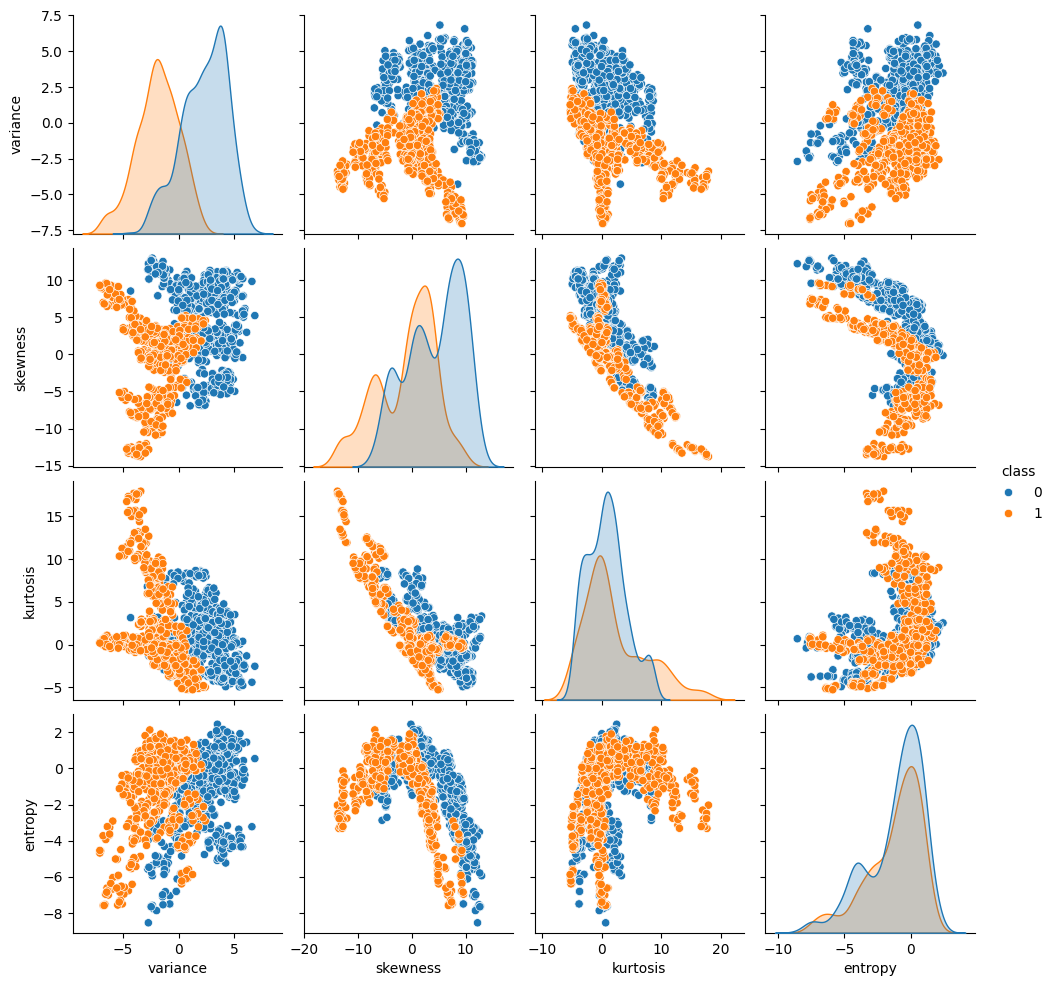

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='class')
plt.show()
plt.suptitle("Features Pairwise")
plt.show

In some feature pairs, we can seperate classes easily. So, decision tree can be good algorithm to run for these features. But for some feature pairs, seperation can be hard.


### Decision Tree Implementation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
x = df.drop('class', axis=1)  # colums ( not class )
y = df['class']               # tags
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # split data into testing and training)



In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)   #model training


DecisionTreeClassifier(random_state=42)

### Accuracy - Classification Report and Confusion Matrix

In [8]:
y_pred = model.predict(x_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9805825242718447

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412


Confusion Matrix:
 [[227   2]
 [  6 177]]


### Classification Tree with Different Parameters


🔧 Experiment 1: max_depth=2, min_samples_split=2, criterion=gini
Accuracy: 0.9053
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       229
           1       0.92      0.86      0.89       183

    accuracy                           0.91       412
   macro avg       0.91      0.90      0.90       412
weighted avg       0.91      0.91      0.90       412



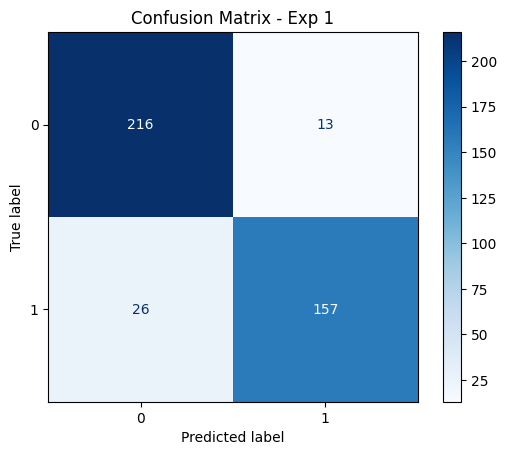

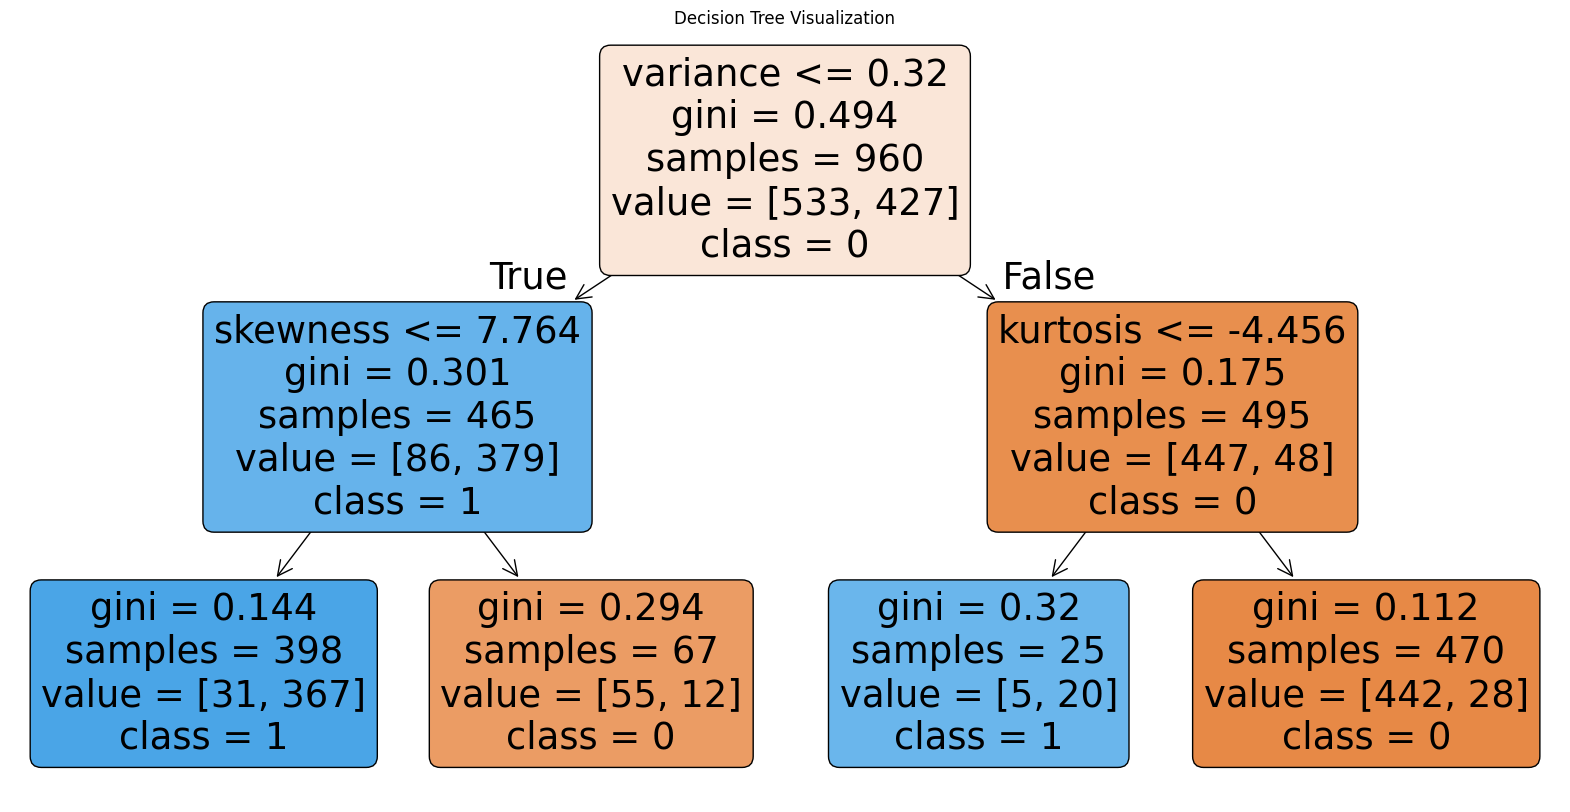


🔧 Experiment 2: max_depth=3, min_samples_split=2, criterion=entropy
Accuracy: 0.9539
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       229
           1       0.96      0.93      0.95       183

    accuracy                           0.95       412
   macro avg       0.95      0.95      0.95       412
weighted avg       0.95      0.95      0.95       412



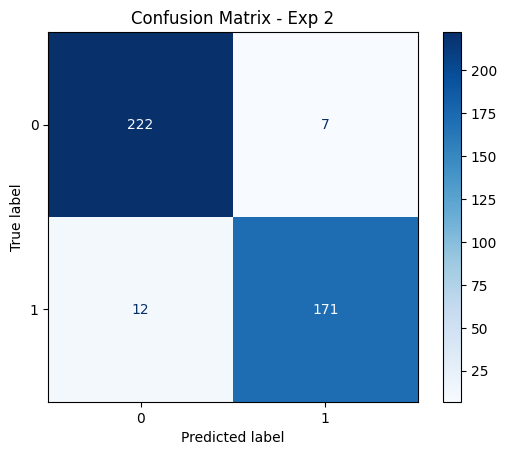

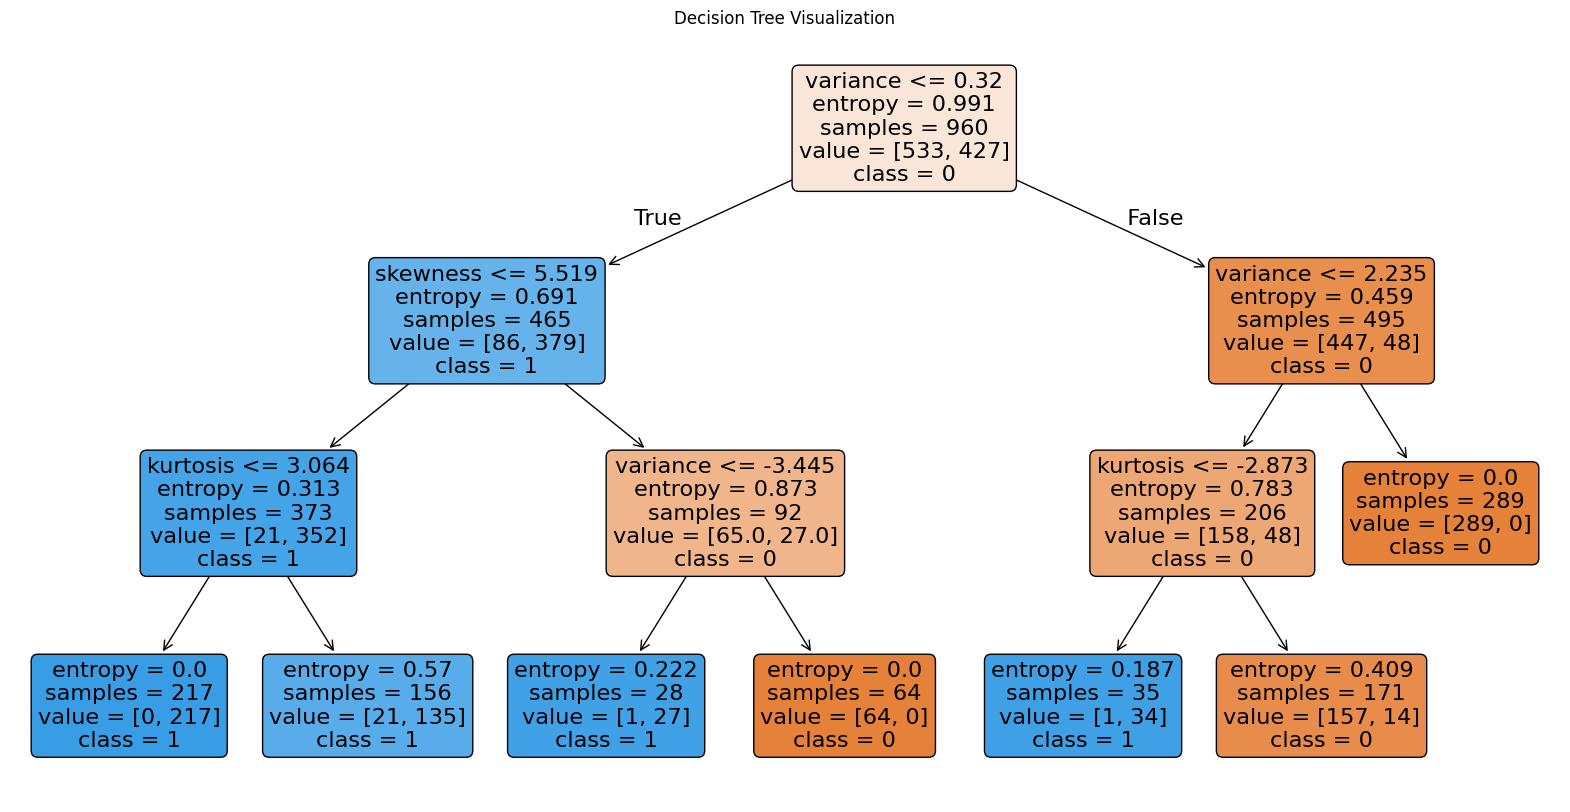


🔧 Experiment 3: max_depth=4, min_samples_split=5, criterion=gini
Accuracy: 0.9442
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       229
           1       0.97      0.90      0.93       183

    accuracy                           0.94       412
   macro avg       0.95      0.94      0.94       412
weighted avg       0.95      0.94      0.94       412



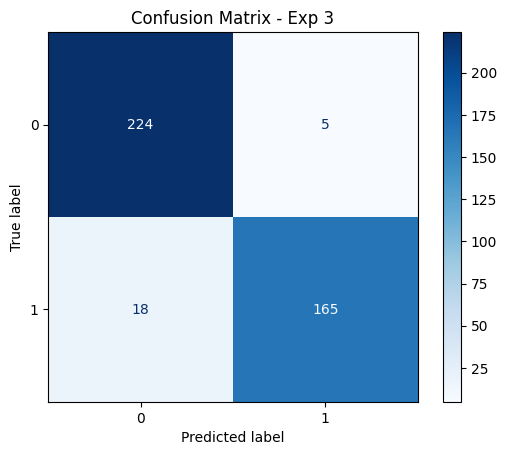

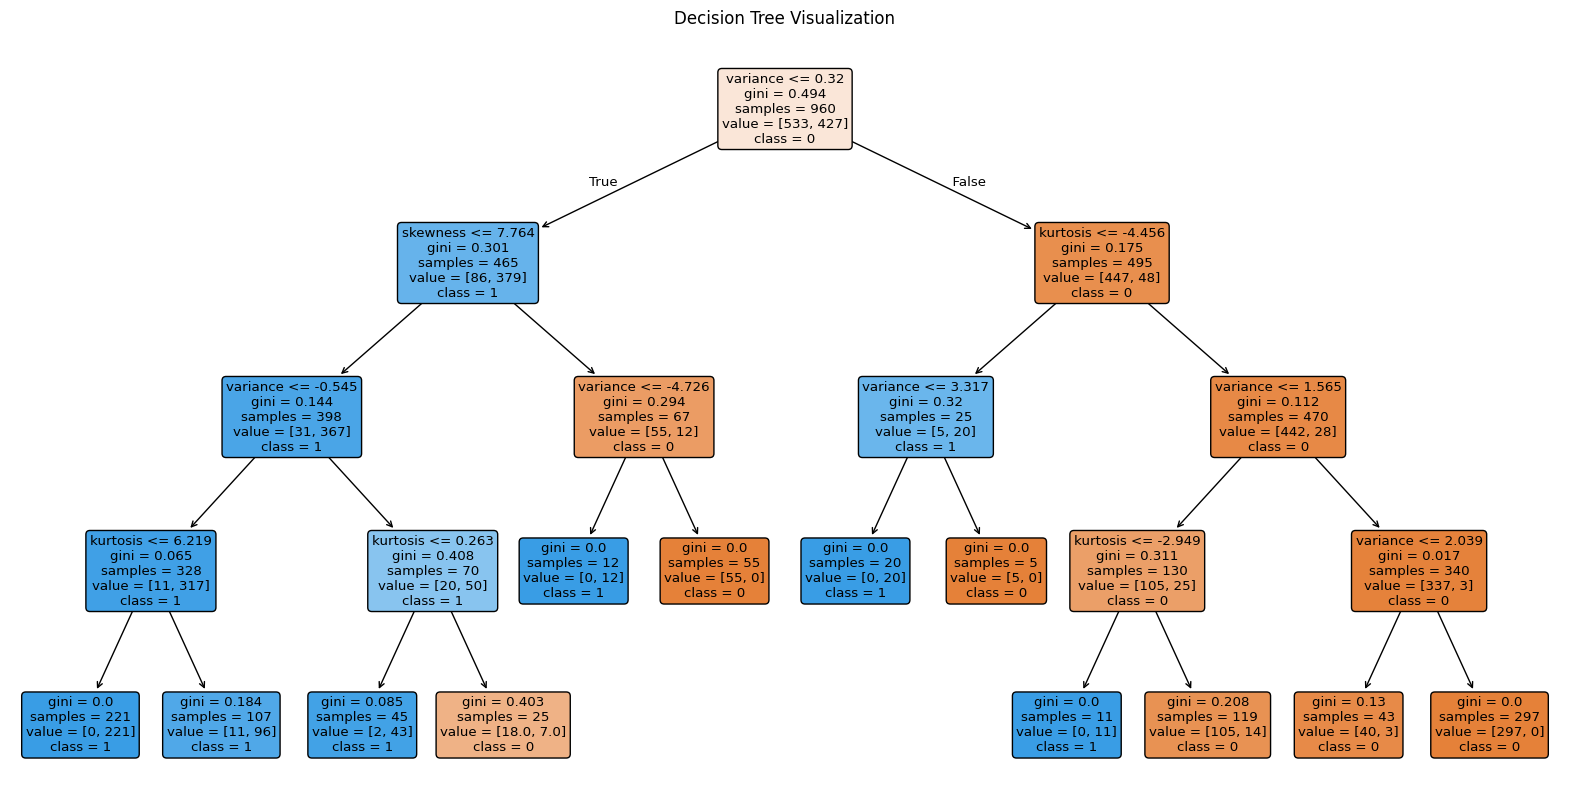


🔧 Experiment 4: max_depth=5, min_samples_split=10, criterion=entropy
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       229
           1       0.99      0.97      0.98       183

    accuracy                           0.99       412
   macro avg       0.99      0.98      0.99       412
weighted avg       0.99      0.99      0.99       412



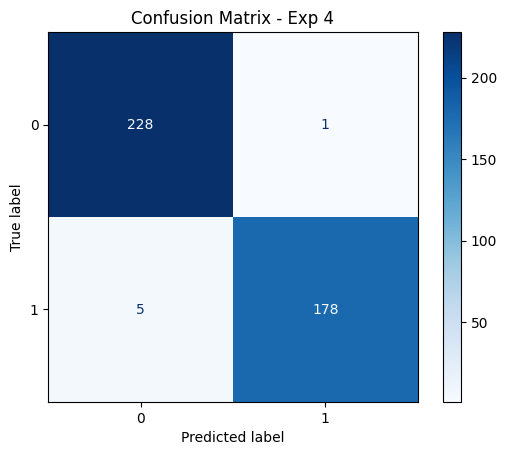

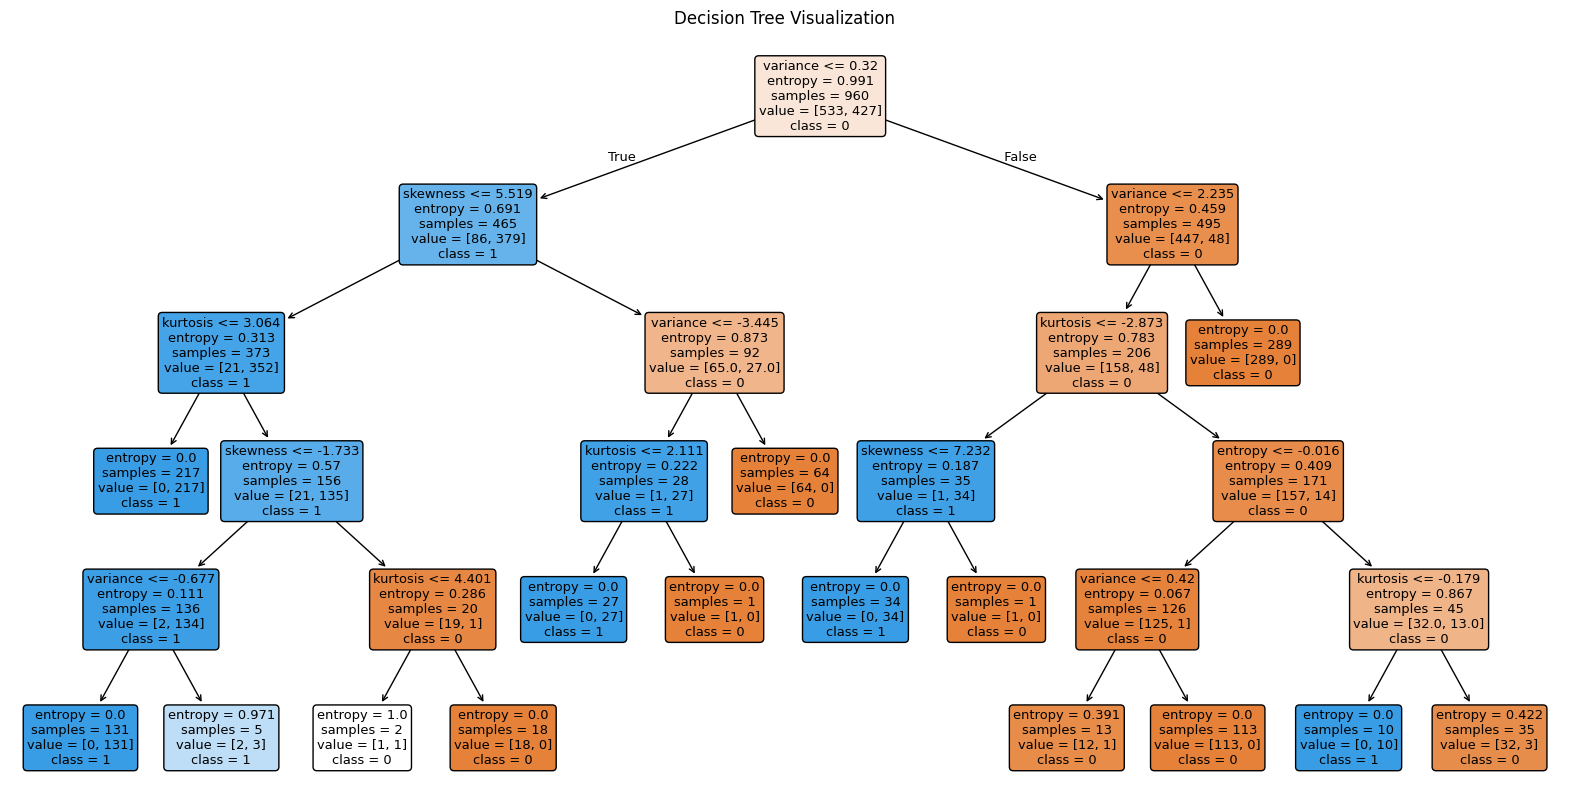

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


params = [
    {"m_d": 2, "m_s_s": 2, "crit": "gini"},
    {"m_d": 3, "m_s_s": 2, "crit": "entropy"},
    {"m_d": 4, "m_s_s": 5, "crit": "gini"},
    {"m_d": 5, "m_s_s": 10, "crit": "entropy"}
]
# loop for examine the tree with different parameters
for i, p in enumerate(params):
    print(f"\n🔧 Experiment {i+1}: max_depth={p['m_d']}, min_samples_split={p['m_s_s']}, criterion={p['crit']}")

    model = DecisionTreeClassifier(
        max_depth=p['m_d'],
        min_samples_split=p['m_s_s'],
        criterion=p['crit'],
        random_state=42
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Accuracy and class. report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix - Exp {i+1}")
    plt.show()

    #plot tree
    plt.figure(figsize=(20,10))
    plot_tree(model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
    plt.title("Decision Tree Visualization")
    plt.show()


### Feature Importance Analysis

In [10]:
best_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion="entropy", random_state=42)
best_model.fit(x_train, y_train)

feature_importance = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
0  variance    0.601846
1  skewness    0.215160
2  kurtosis    0.158717
3   entropy    0.024277


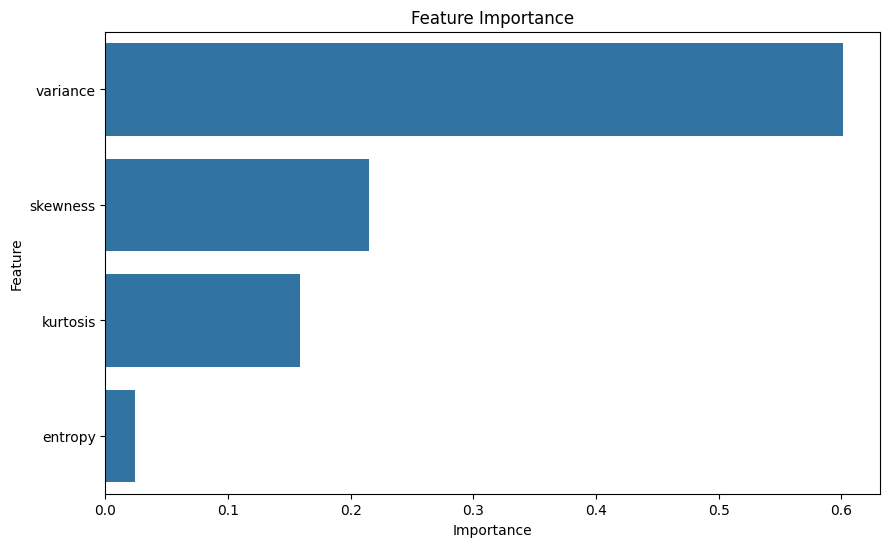

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The most important feature was variance, and then came skewness. This matches what we saw in the scatter plots before. These two features were mostly used in the top parts of the decision tree. On the other hand, kurtosis and entropy were not as important, so the model didn’t use them much when making decisions.

### Comment

From this question, I learned how to train and evaluate a decision tree model step by step. I also saw how changing parameters like max_depth or criterion can affect performance. I learned to read accuracy, precision, recall, and F1-score, and how to use the confusion matrix and feature importance to understand the model better.

I think decision trees work well for this dataset because the features help separate the classes clearly. The model is easy to understand and gives good accuracy.